In [21]:
%reload_ext autoreload
%autoreload 2

In [22]:
import pandas as pd
import numpy as np
import dataloader
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
loan = dataloader.LoanForest()
data = loan.data
splits = 10
column_names = loan.column_names
kf = KFold(n_splits=splits, shuffle=True)
X, y = dataloader.split_variables_and_target(data)




In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

def classify(classifier, X, y, kf):
    mse_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    true_positive_scores = []
    true_negative_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train a random forest classifier
        classifier.fit(X_train, y_train)
        # Test on the X_test data
        classifier_predictions = classifier.predict(X_test)

        # Calculate the mean squared error
        mse = mean_squared_error(y_test, classifier_predictions)
        mse_scores.append(mse)
        #print("Random Forest Classifier MSE:", mse)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, classifier_predictions.round())
        accuracy_scores.append(accuracy)
        #print("Random Forest Classifier Accuracy:", accuracy)

        cm = confusion_matrix(y_test, classifier_predictions)

        true_positive = cm[0, 0]
        true_negative = cm[1, 1]
        false_positive = cm[0, 1]
        false_negative = cm[1, 0]
        
        
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        true_positive_scores.append(true_positive / (true_positive + false_positive))
        true_negative_scores.append(true_negative / (true_negative + false_negative))
    mse_avg = np.mean(mse_scores)
    accuracy_avg = np.mean(accuracy_scores)
    precision_avg = np.mean(precision_scores)
    recall_avg = np.mean(recall_scores)
    true_positive_avg = np.mean(true_positive_scores)
    true_negative_avg = np.mean(true_negative_scores)
    return mse_avg, accuracy_avg, precision_avg, recall_avg, true_positive_avg, true_negative_avg


In [34]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split=5)
mse_avg, accuracy_avg, precision_avg, recall_avg, true_positive_avg, true_negative_avg = classify(model, X, y, kf)
print("Random Forest Classifier MSE:", mse_avg)
print("Random Forest Classifier Accuracy:", accuracy_avg)
print("Random Forest Classifier Precision:", precision_avg)
print("Random Forest Classifier Recall:", recall_avg)
print("Random Forest Classifier True Positive Rate:", true_positive_avg)
print("Random Forest Classifier True Negative Rate:", true_negative_avg)
print("Random Forest Classifier False Positive Rate:", 1 - true_negative_avg)
print("Random Forest Classifier False Negative Rate:", 1 - true_positive_avg)

NameError: name 'classify' is not defined

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100)
adaboost_classifier.fit(X_train, y_train)
# Test on the X_test data
adaboost_classifier_predictions = adaboost_classifier.predict(X_test)

# Calculate the mean squared error
adaboost_mse = mean_squared_error(y_test, adaboost_classifier_predictions)
print("AdaBoost Classifier MSE:", adaboost_mse)

# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_classifier_predictions.round())
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, adaboost_classifier_predictions)

# Print confusion matrix
print(cm)

true_positive = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

#How many retrieved instances are relevant
print("Precision:", precision)

#How many relevant instances are retrieved
print("Recall:", recall)


C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier MSE: 0.16440501043841335
AdaBoost Classifier Accuracy: 0.8355949895615866
[[1591   20]
 [ 295   10]]
Precision: 0.9875853507138423
Recall: 0.8435843054082715


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

#Train a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100)
gradient_boosting_classifier.fit(X_train, y_train)
# Test on the X_test data
gradient_boosting_classifier_predictions = gradient_boosting_classifier.predict(X_test)

# Calculate the mean squared error
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_classifier_predictions)
print("Gradient Boosting Classifier MSE:", gradient_boosting_mse)


# Calculate accuracy
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_classifier_predictions.round())
print("Gradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, gradient_boosting_classifier_predictions)

# Print confusion matrix
print(cm)

true_positive = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

#How many retrieved instances are relevant
print("Precision:", precision)

#How many relevant instances are retrieved
print("Recall:", recall)

Gradient Boosting Classifier MSE: 0.15866388308977036
Gradient Boosting Classifier Accuracy: 0.8413361169102297
[[1600   11]
 [ 293   12]]
Precision: 0.9931719428926132
Recall: 0.8452192287374538


In [26]:
from sklearn.ensemble import BaggingClassifier

# Train a Bagging classifier
bagging_classifier = BaggingClassifier(n_estimators=100)
bagging_classifier.fit(X_train, y_train)
# Test on the X_test data
bagging_classifier_predictions = bagging_classifier.predict(X_test)

# Calculate the mean squared error
bagging_mse = mean_squared_error(y_test, bagging_classifier_predictions)
print("Bagging Classifier MSE:", bagging_mse)

# Calculate accuracy
bagging_accuracy = accuracy_score(y_test, bagging_classifier_predictions.round())
print("Bagging Classifier Accuracy:", bagging_accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, bagging_classifier_predictions)

# Print confusion matrix
print(cm)

true_positive = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

#How many retrieved instances are relevant
print("Precision:", precision)

#How many relevant instances are retrieved
print("Recall:", recall)

Bagging Classifier MSE: 0.1649269311064718
Bagging Classifier Accuracy: 0.8350730688935282
[[1592   19]
 [ 297    8]]
Precision: 0.9882060831781502
Recall: 0.8427739544732663


In [27]:
from sklearn.ensemble import VotingClassifier

# Train a Voting classifier
voting_classifier = VotingClassifier(estimators=[('rf', random_forest_classifier), ('ab', adaboost_classifier), ('gb', gradient_boosting_classifier), ('bg', bagging_classifier)], voting='soft')
voting_classifier.fit(X_train, y_train)
# Test on the X_test data
voting_classifier_predictions = voting_classifier.predict(X_test)

# Calculate the mean squared error
voting_mse = mean_squared_error(y_test, voting_classifier_predictions)
print("Voting Classifier MSE:", voting_mse)

# Calculate accuracy
voting_accuracy = accuracy_score(y_test, voting_classifier_predictions.round())
print("Voting Classifier Accuracy:", voting_accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, voting_classifier_predictions)

# Print confusion matrix
print(cm)

true_positive = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

#How many retrieved instances are relevant
print("Precision:", precision)

#How many relevant instances are retrieved
print("Recall:", recall)

C:\Users\tobia\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier MSE: 0.16127348643006262
Voting Classifier Accuracy: 0.8387265135699373
[[1602    9]
 [ 300    5]]
Precision: 0.994413407821229
Recall: 0.8422712933753943


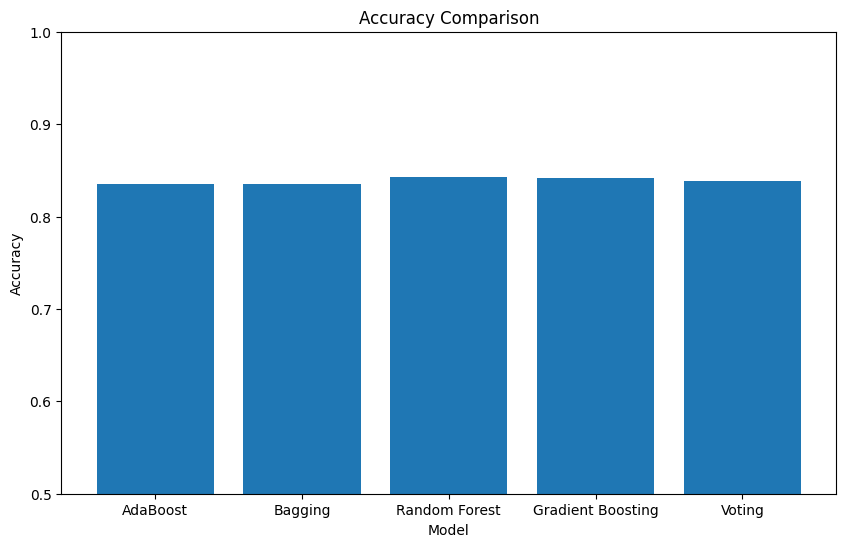

In [32]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_values = [adaboost_accuracy, bagging_accuracy, forest_accuracy, gradient_boosting_accuracy, voting_accuracy]

# Model names
model_names = ['AdaBoost', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Voting']

# Create the graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.5, 1.0)  # Set the y-axis limits if needed
plt.show()


In [29]:
print(f"Prediction rate : {forest_classifier_predictions.sum() / len(forest_classifier_predictions)}")
print(f"Actual rate : {y_test.sum() / len(y_test)}")

Prediction rate : 0.007828810020876827
Actual rate : 0.15918580375782881


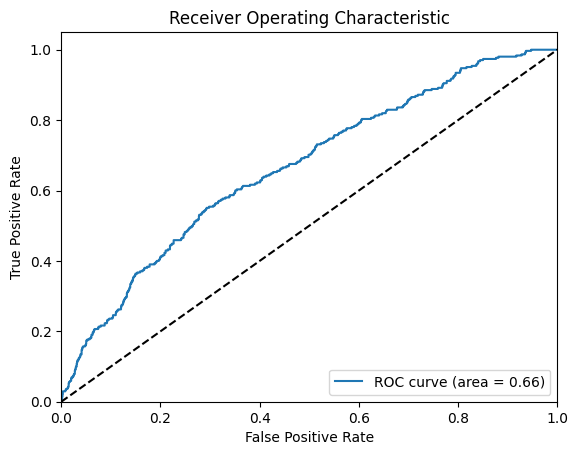

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_pred_proba = random_forest_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
